In [21]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [4]:
raw_df = pd.DataFrame.from_csv("cleaned_data.csv")
raw_df.head()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,SurfaceTempK,DiscoveryMethod,DiscoveryYear,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn,HostStar
PlanetIdentifier,,,,,,,,,,,,,,,
HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,NaN,RV,2016.0,0.889,1.362,-0.31,5627.0,Confirmed planets,HD 143761
HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,NaN,RV,2016.0,0.889,1.362,-0.31,5627.0,Confirmed planets,HD 143761
KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,transit,2012.0,0.460,0.450,0.00,3584.0,Controversial,KOI-1843
KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,transit,NaN,0.460,0.450,0.00,3584.0,Controversial,KOI-1843
KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,transit,NaN,0.460,0.450,0.00,3584.0,Controversial,KOI-1843


### Looking to fill NaN values for RadiusJpt   
using primarily mass and maybe period   
perhaps SemiMajorAxisAU and HostStarMassSlrMass/HostStarRadiusSlrRad would give some insight too

In [28]:
full_stat_df = raw_df.dropna(subset = ['RadiusJpt', 'PlanetaryMassJpt'])
print(len(full_radius_df))
full_radius_df.head(10)

519


,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,SurfaceTempK,DiscoveryMethod,DiscoveryYear,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,ListsPlanetIsOn,HostStar
PlanetIdentifier,,,,,,,,,,,,,,,
KOI-1843.03,0,0.001400,0.054000,0.176891,0.00480,NaN,NaN,transit,2012.0,0.460,0.4500,0.00,3584.0,Controversial,KOI-1843
Kepler-9 b,0,0.250000,0.840000,19.224180,0.14300,0.0626,707.2,transit,2010.0,1.070,1.0200,0.12,5777.0,Confirmed planets,Kepler-9
Kepler-9 c,0,0.170000,0.820000,39.031060,0.22900,0.0684,557.9,transit,2010.0,1.070,1.0200,0.12,5777.0,Confirmed planets,Kepler-9
Kepler-9 d,0,0.022000,0.147000,1.592851,0.02710,NaN,1601.5,transit,2010.0,1.070,1.0200,0.12,5777.0,Confirmed planets,Kepler-9
WASP-124 b,0,0.600000,1.240000,3.372650,0.04490,NaN,1400.0,transit,2016.0,1.070,NaN,-0.02,6050.0,Confirmed planets,WASP-124
WASP-82 b,0,1.240000,1.670000,2.705782,0.04470,NaN,2190.0,transit,2013.0,1.630,2.1800,0.12,6490.0,Confirmed planets,WASP-82
Gliese 1214 b,0,0.019500,0.252500,1.580404,0.01488,0.0000,604.0,transit,2009.0,0.176,0.2213,0.10,3250.0,Confirmed planets,Gliese 1214
Kepler-131 b,0,0.050740,0.219624,16.092000,NaN,NaN,NaN,transit,2014.0,1.020,1.0300,0.12,5685.0,Confirmed planets,Kepler-131
Kepler-131 c,0,0.025952,0.076549,25.516900,NaN,NaN,NaN,transit,2014.0,1.020,1.0300,0.12,5685.0,Confirmed planets,Kepler-131


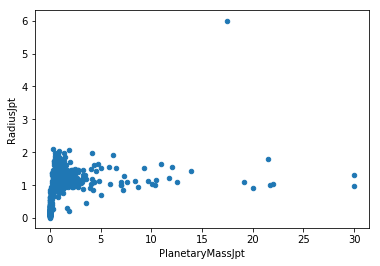

In [26]:
full_radius_df.plot(x='PlanetaryMassJpt', y='RadiusJpt', kind = 'scatter')

plt.show()